In [142]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt

Переобучение и дисперсия

Цель состоит не в минимизации суммы квадратов, а в том, чтобы делать "правильные" предсказания на основе данных

Переобученные модели чувствительны к выбросам, которые находятся далеко от остальных точек - будет высокая дисперсия, поэтому к моделяям специально добавляется смещение 

Смещение модели означает, что предпочтение отдается определенной схеме (например, прямая линия), а не графикам со сложной структурой, минимизирующей сумму остатков

Если в модель добавить смещение, то есть риск недообучения

Балансировка: минимизация функции потерь -> переобучение, смещение -> недообучение

Гребневая регрессия - добавляется смещение в виде штрафа, из-за этого хуже идет подгонка

Лассо-регрессия - удаление некоторых переменных

Механически применить линейную регрессию к данным, сделать на основе полученной модели прогноз и думать, что все в порядке, - нельзя

In [143]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28]
    ]
)

Градиентный спуск - пакетный градиентный спуск. Для работы используются ВСЕ доступные обучающие данные

Стохастический градиентный спуск. На каждой итерации обучаемся только на одной выборке из данных

сокращение числа вычислений

вносим смещения - боремся с переобучением

Мини-пакетный градиентный спуск. На каждой итерации используется несколько выборок

In [144]:
x = data[:, 0]
y = data[:, 1]

n = len(x)

w1 = 0.0
w0 = 0.0

L = 0.001

# размер выборки
sample_size = 1

iterations = 100_000
for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace=False)
    Dw0 = 2 * sum((-y[idx] + w0 + w1 * x[idx]))
    Dw1 = 2 * sum((x[idx] * (-y[idx] + w0 + w1 * x[idx])))
    w0 -= L * Dw0
    w1 -= L * Dw1

print(w1, w0)

2.3264507491950206 0.8301324835241167


Как оценить насколько сильно промахиваются прогнозы при использовании линейной регрессии?

In [145]:
data_df = pd.DataFrame(data)
print(data_df.corr(method='pearson'))

         0        1
0  1.00000  0.97684
1  0.97684  1.00000


In [146]:
data_df[1] = data_df[1].values[::-1]
print(data_df.corr(method='pearson'))

         0        1
0  1.00000 -0.97684
1 -0.97684  1.00000


Коэффициент корреляции помогает понять, есть ли связь между двумя переменными

Обучающие и тестовые выборки

Основной метод борьбы с переобучением заключается в том, что набор данных делится на обучающую и тестовую выборки


Во всех видах машинного обучения с учителем это встречается

Обычная пропорция 2/3 на обучение и 1/3 на тест (4/5 к 1/5 и 9/10 к 1/10)

In [147]:
data_df = pd.DataFrame(data)
X = data_df.values[:, :-1]
Y = data_df.values[:, 1]

""" print(X)
print(Y) """

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)
""" print(X_train)
print(Y_train)
print(X_test)
print(Y_test) """

model = LinearRegression()
model.fit(X_train, Y_train)

r = model.score(X_test, Y_test)
print(r)

0.9378691836280594


In [148]:
data_df = pd.DataFrame(data)
X = data_df.values[:, :-1]
Y = data_df.values[:, 1]

kfold = KFold(n_splits=3, random_state=1, shuffle=True) # 3-х кратная перекрестная валидация

model = LinearRegression()

results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean(), results.std())

[ 0.88414769 -2.35154626  0.75792214]
-0.23649214168139 1.4964566263570582


Метрики показывают, насколько ЕДИНООБРАЗНО ведет себя модель на разных выборках

Возможно использование поэлементной перекрестной валидации - мало данных

Случайная валидация

Валидационная выборка - для сравнения различных моделей или конфигураций

In [149]:
data_df = pd.read_csv('multiple_independent_variable_linear.csv')
print(data_df.head())

X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

model = LinearRegression().fit(X, Y)

print(model.coef_, model.intercept_)

   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77
[2.00672647 3.00203798] 20.109432820035977


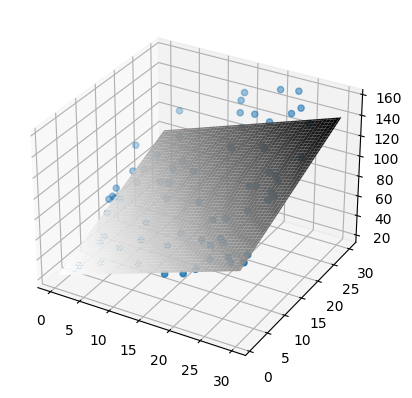

In [150]:
x1 = X[:, 0]
x2 = X[:, 1]
y = Y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)

X1_, X2_ = np.meshgrid(x1_, x2_)
Y = model.intercept_ + model.coef_[0] * X1_ + model.coef_[0] * X2_

ax.plot_surface(X1_, X2_, Y, cmap='Greys')